#Assignment 9A - GradCam implementation 

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017)
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import sys

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

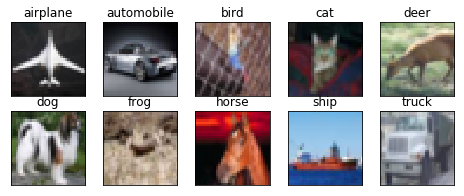

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    imname = class_names[i]+'.png'# add name with path
    cv2.imwrite(imname, im)
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

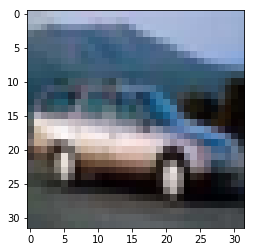

In [4]:
plt.imshow(train_features[4])

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')
import sys
import os
sys.path.append("/content/drive/My Drive/EVA_assi_9")
working_path = '/content/drive/My Drive/EVA_assi_9'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3>Modified Network with respect to below points</h3>
<br>remove dense
<br>add layers required to reach RF
<br>see if all dropouts are properly placed
<br>follow the guidelines we discussed in the class
<br>Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same',"


In [8]:
model = Sequential()                                                            # Image size - RF #border same  - padding which maintains the size of image as same after conv as well. 

model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))# 32 - 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(96, 3, 3,border_mode='same',use_bias=False))                           #32 - 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(48, 1, 1, activation='relu',use_bias=False))
model.add(MaxPooling2D(pool_size=(2, 2)))                                      #16 - 10



model.add(Convolution2D(48, 3, 3, border_mode='same',use_bias=False))                         #16 -12
model.add(BatchNormalization())      
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Convolution2D(96, 3, 3, border_mode='same',use_bias=False))                         #16 - 14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Convolution2D(192, 3, 3,border_mode='same',use_bias=False))                          #16 - 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Convolution2D(48, 1, 1, activation='relu',use_bias=False))                          #8 - 32
model.add(MaxPooling2D(pool_size=(2, 2)))

                         #8 - 28
#model.add(Dropout(0.25))

model.add(Convolution2D(48, 3, 3,use_bias=False))                        #8 - 34
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Convolution2D(92,3,3,use_bias=False))                           #6 - 36
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(92,4,4,use_bias=False))                           #4 - 38
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(10, 1,use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model


W0702 02:54:25.402354 140652950550400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0702 02:54:25.422221 140652950550400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 02:54:25.425210 140652950550400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 02:54:25.

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0702 02:33:20.102140 139621685102464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        41472     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  app.launch_new_instance()


Epoch 1/100
390/390 [==============================] - 27s 70ms/step - loss: 1.5435 - acc: 0.4400 - val_loss: 1.6727 - val_acc: 0.4479

Epoch 00001: val_acc improved from -inf to 0.44790, saving model to /content/drive/My Drive/EVA_assi_9/saved1.hdf5
Epoch 2/100
390/390 [==============================] - 22s 57ms/step - loss: 1.0498 - acc: 0.6275 - val_loss: 1.1933 - val_acc: 0.5792

Epoch 00002: val_acc improved from 0.44790 to 0.57920, saving model to /content/drive/My Drive/EVA_assi_9/saved1.hdf5
Epoch 3/100
390/390 [==============================] - 22s 56ms/step - loss: 0.8694 - acc: 0.6936 - val_loss: 0.8296 - val_acc: 0.7111

Epoch 00003: val_acc improved from 0.57920 to 0.71110, saving model to /content/drive/My Drive/EVA_assi_9/saved1.hdf5
Epoch 4/100
390/390 [==============================] - 22s 56ms/step - loss: 0.7517 - acc: 0.7368 - val_loss: 0.8108 - val_acc: 0.7195

Epoch 00004: val_acc improved from 0.71110 to 0.71950, saving model to /content/drive/My Drive/EVA_assi_9

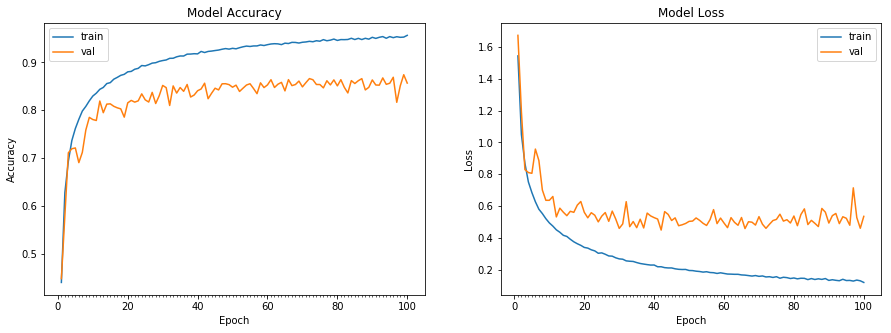

Accuracy on test data is: 85.68


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
# train the model
start = time.time()
# Train the model
filepath=working_path+"/saved1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks= callbacks_list, verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.load_weights("/content/drive/My Drive/EVA_assi_9/saved1.hdf5")

In [0]:
loss,acc = model.evaluate(test_features, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

(32, 32, 3) (32, 32, 3)


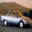

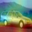

(32, 32, 3) (32, 32, 3)


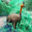

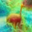

(32, 32, 3) (32, 32, 3)


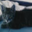

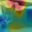

(32, 32, 3) (32, 32, 3)


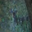

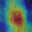

In [0]:
idx=[4,6,9,10]
selected_image=[train_features[i] for i,_ in enumerate(train_features) if i in idx ]
for img in selected_image:
  #print(img.shape)
  #x = image.img_to_array(img)
  x = np.expand_dims(img, axis=0)
  x = preprocess_input(x)
  #print(x.shape)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_9")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  print(img.shape,heatmap.shape)
  #immg = img.astype('float32')*255
  #img2=np.uint8(255*img)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0,dtype=cv2.CV_32F)
  #plt.imshow(img)
  #plt.imshow(superimposed_img)
  cv2_imshow(img)
  cv2_imshow(superimposed_img)
  cv2.waitKey(0)

Above fig have a vizualization with original and superimposed image.

#Method 2

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

-1

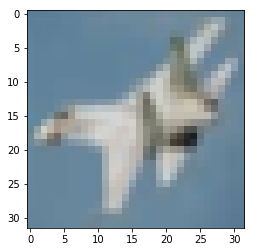

In [35]:
x = test_features[10]
x = np.expand_dims(x, axis=0)
preds = model.predict(x,batch_size=1)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_9")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = (test_features[10])
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#img2=np.uint8(255*img)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0,dtype=cv2.CV_32F)
#cv2_imshow(img)
#cv2_imshow(superimposed_img)
plt.imshow(img)
#plt.imshow(superimposed_img)
cv2.waitKey(0)

W0702 04:17:35.003271 140652950550400 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


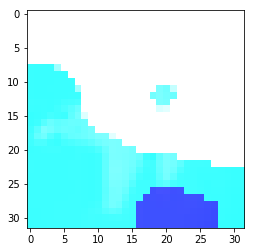

In [36]:
plt.imshow(superimposed_img)

-1

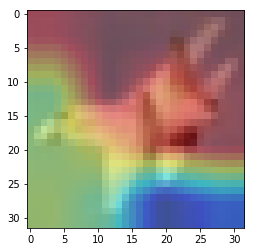

In [33]:
x = test_features[10]
x = np.expand_dims(x, axis=0)
preds = model.predict(x,batch_size=1)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_9")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(20):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = (test_features[10])
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
img2=np.uint8(255*img)
superimposed_img = cv2.addWeighted(img2, 0.6, heatmap, 0.4, 0)
#cv2_imshow(img)
#cv2_imshow(superimposed_img)
plt.imshow(img)
plt.imshow(superimposed_img)
cv2.waitKey(0)